# Homework1: Question5
## Emre Can Acikgoz

In [1]:
using Random, Statistics, Plots, Printf
Random.seed!(430)
N = 10000;

In [2]:
# generate 10000 realizations of a Gaussian random variable Xn with mean 1 and variance 4
X_n = 2 * randn(N) .+ 1;
@printf("%d Gaussian random variable Xn with mean: %.5f and variance: %.5f", N, mean(X_n), var(X_n))

10000 Gaussian random variable Xn with mean: 0.99816 and variance: 4.02063

# Question5 Part (a)

In [3]:
# Calculate S_n
S_n = 1/length(X_n[1:N]) * sum(X_n[1:N])
@printf("Obtained Sn: %.5f from Xn samples", S_n)

Obtained Sn: 0.99816 from Xn samples

In [4]:
# Define the running average
function running_avg(n)
    values = []
    for i in 1:n
        S_n = 1/length(X_n[1:i]) * sum(X_n[1:i])
        push!(values, S_n)
    end
    return values
end

running_avg (generic function with 1 method)

In [5]:
# Samples for each n values from 1 to 10,000
X_nSamples = running_avg(N);

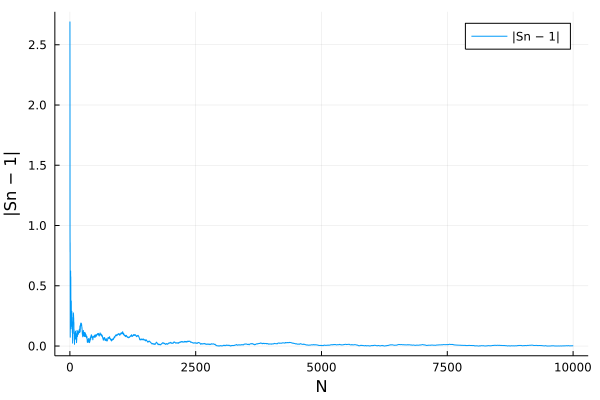

In [6]:
# Plot |Sn − 1| as a function of n
S_nMinus1 = abs.(X_nSamples .- 1);
plot(1:N, S_nMinus1, labels="|Sn − 1|", xlabel="N", ylabel="|Sn − 1|")

# Question5 Part (b)

In [7]:
# Define the time correlation
function time_correlation(X_n, n)
    Kn_list = []
    for n in 1:N-1
        Kn=0
        for k in 1:n
            Kn += X_n[k]*X_n[k+1]
        end
        val = 1/n * Kn;
        push!(Kn_list, val)
    end
    return Kn_list
end

time_correlation (generic function with 1 method)

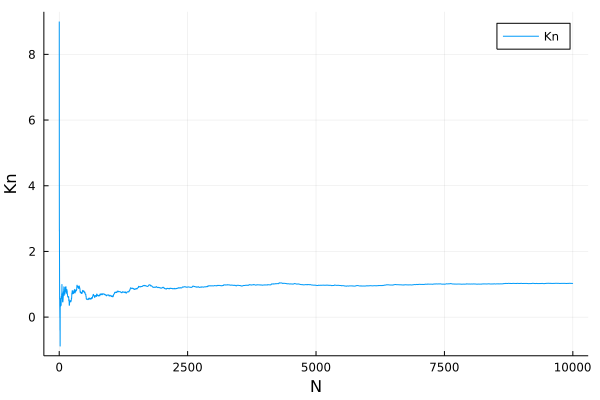

In [8]:
# Plot Kn
T = time_correlation(X_n, N);
plot(1:length(T), T, labels="Kn", xlabel="N", ylabel="Kn")

As time goes to infinity, K_n converges to 1.